**1.Installing All The Library**

In [ ]:
!pip install pandas numpy matplotlib vaderSentiment wordcloud TextBlob

**2. Importing All The Library**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
from textblob import TextBlob
import string

**3. Setting Data Width For Feedback Comment**

In [ ]:
pd.set_option('display.max_colwidth', 200)

**4. Uploading Data From .CSV File**

In [ ]:
from google.colab import files
uploaded = files.upload()
df = pd.read_csv("Feedback Data.csv")
df.head()

Saving Feedback Data.csv to Feedback Data (6).csv


,Time Stamp,Event Name,Event Type,Conducted By,Rating,Feedback Comment
0,2025-02-08 11:05:55,Sports Meet,Technical,Computer Science,3,"Nothing special, but okay."
1,2025-02-27 11:05:55,Sports Meet,Cultural,Mechanical,1,Poorly managed event.
2,2024-09-16 11:05:55,Guest Lecture,Cultural,Electronics,4,Would love to attend again.
3,2025-02-22 11:05:55,Seminar,Sports,Computer Science,1,Poorly managed event.
4,2025-05-11 11:05:55,Cultural Fest,Workshop,Electronics,1,The event was too long.


**5. Cleaning Data**

In [ ]:
df.columns = [c.strip().lower().replace(" ", "_") for c in df.columns]
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df = df.dropna(subset=['rating'])
df = df.drop_duplicates()
print(df.shape)
df.head()


(499, 6)


,time_stamp,event_name,event_type,conducted_by,rating,feedback_comment
0,2025-02-08 11:05:55,Sports Meet,Technical,Computer Science,3,"Nothing special, but okay."
1,2025-02-27 11:05:55,Sports Meet,Cultural,Mechanical,1,Poorly managed event.
2,2024-09-16 11:05:55,Guest Lecture,Cultural,Electronics,4,Would love to attend again.
3,2025-02-22 11:05:55,Seminar,Sports,Computer Science,1,Poorly managed event.
4,2025-05-11 11:05:55,Cultural Fest,Workshop,Electronics,1,The event was too long.


**6. Event Wise Rating Count**

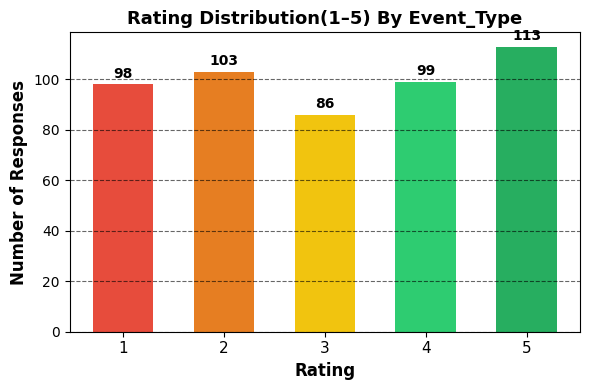

In [ ]:
rating_counts = df['rating'].value_counts().sort_index()

colors = ["#e74c3c", "#e67e22", "#f1c40f", "#2ecc71", "#27ae60"]

plt.figure(figsize=(6, 4))
bars = plt.bar(rating_counts.index, rating_counts.values,color=colors, width=0.6)

plt.title("Rating Distribution(1–5) By Event_Type", fontsize=13, fontweight='bold')
plt.xlabel("Rating", fontsize=12,fontweight='bold')
plt.ylabel("Number of Responses", fontsize=12,fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.6,color="black")

for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2,
             bar.get_height() + 1.5,
             str(bar.get_height()),
             ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.xticks(rating_counts.index, fontsize=11)

plt.tight_layout()
plt.show()

**7. Average Rating By Each Event**

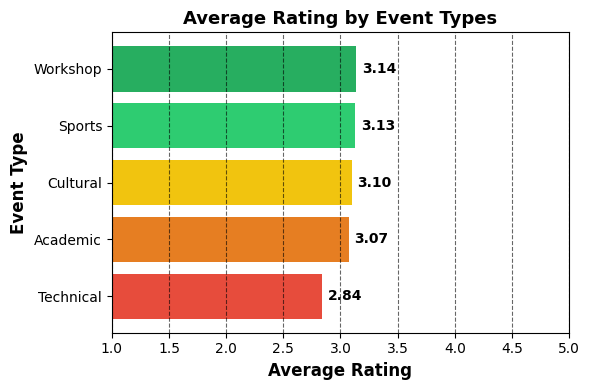

In [ ]:
avg_ratings = df.groupby('event_type')['rating'].mean().sort_values()

colors = ["#e74c3c", "#e67e22", "#f1c40f", "#2ecc71", "#27ae60"]

plt.figure(figsize=(6,4))
bars = plt.barh(avg_ratings.index, avg_ratings.values, color=colors)

plt.title("Average Rating by Event Types", fontsize=13, fontweight='bold')
plt.xlabel("Average Rating", fontsize=12,fontweight='bold')
plt.ylabel("Event Type", fontsize=12,fontweight='bold')
plt.grid(axis='x', linestyle='--', alpha=0.6,color="black")

for bar in bars:
    plt.text(bar.get_width() + 0.05, bar.get_y() + bar.get_height()/2,
             f"{bar.get_width():.2f}", va='center', fontsize=10, fontweight='bold')

plt.xlim(1, 5)
plt.tight_layout()
plt.show()

**8. Sentiment Analysis Into Positive, Negative & Neutral**

In [ ]:
analyzer = SentimentIntensityAnalyzer()

def label_sentiment(score):
    if score <= -0.05: return 'Negative'
    elif score >= 0.05: return 'Positive'
    else: return 'Neutral'

df['sentiment_score'] = df['feedback_comment'].astype(str).apply(lambda t: analyzer.polarity_scores(t)['compound'])
df['sentiment_label'] = df['sentiment_score'].apply(label_sentiment)

df[['feedback_comment','sentiment_score','sentiment_label']].head()

,feedback_comment,sentiment_score,sentiment_label
0,"Nothing special, but okay.",-0.3875,Negative
1,Poorly managed event.,0.0000,Neutral
2,Would love to attend again.,0.6369,Positive
3,Poorly managed event.,0.0000,Neutral
4,The event was too long.,0.0000,Neutral


**9. Feedback Sentiment Ratio**

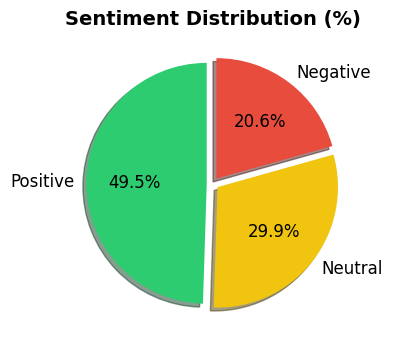

In [ ]:
sentiment_counts = df['sentiment_label'].value_counts()

colors = ['#2ecc71', '#f1c40f', '#e74c3c']

plt.figure(figsize=(4,4))
plt.pie(sentiment_counts,
        labels=sentiment_counts.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=colors[:len(sentiment_counts)],
        shadow=True,
        explode=[0.05]*len(sentiment_counts),
        textprops={'fontsize': 12})

plt.title("Sentiment Distribution (%)", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

**10. Key Insights**

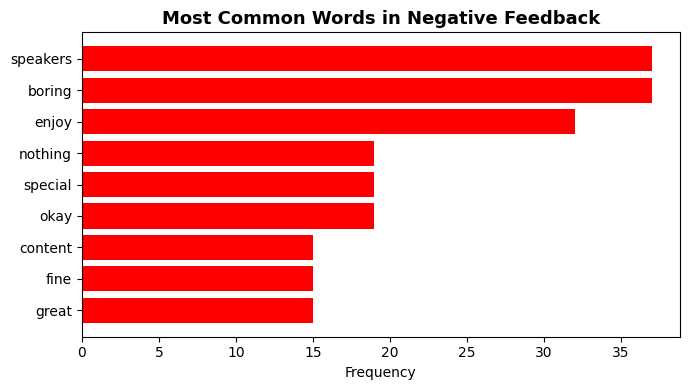


🏆 Top 5 Events by Average Rating


,Event Name,Average Rating
1,Seminar,3.28
2,Guest Lecture,3.19
3,Sports Meet,3.19
4,Workshop,3.15
5,Hackathon,2.93


In [ ]:
neg = df[df['sentiment_label']=='Negative']['feedback_comment'].str.lower()
neg = neg.str.replace(f"[{string.punctuation}]", " ", regex=True)
tokens = " ".join(neg).split()

stop = set(STOPWORDS) | {'event','events','workshop','seminar','fest','cultural','guest','lecture'}
tokens = [t for t in tokens if t not in stop and len(t) > 3]

word_freq = Counter(tokens).most_common(15)
words, counts = zip(*word_freq)

plt.figure(figsize=(7, 4))
plt.barh(words, counts, color="red")
plt.gca().invert_yaxis()
plt.title("Most Common Words in Negative Feedback", fontsize=13, fontweight='bold')
plt.xlabel("Frequency")
plt.tight_layout()
plt.show()

top_events = df.groupby('event_name')['rating'].mean().sort_values(ascending=False).head(5)
top_events_df.index = range(1, len(top_events_df) + 1)
top_events_df.columns = ["Event Name", "Average Rating"]

print("\n🏆 Top 5 Events by Average Rating")
display(top_events_df.style.background_gradient(cmap="Greens").format({"Average Rating": "{:.2f}"}))

**11.Exporting Data Into A New File With Sentiments**

In [ ]:
df.to_csv("Feedback Data With Sentiment.csv", index=False)

from google.colab import files
files.download("Feedback Data With Sentiment.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>